<a href="https://colab.research.google.com/github/peeka-boo0/ml-learning-journey/blob/main/notebooks/day10_feature_importance_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training accuracy: 1.0


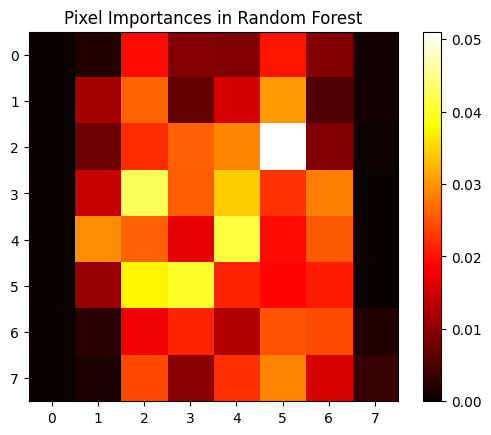

In [31]:
#this cod is for learning purpus

from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load data
digits = load_digits()
X, y = digits.data, digits.target

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
rf.fit(X, y)

#printing the accuracy score
print("Training accuracy:", rf.score(X, y))
# Get feature importance
importances = rf.feature_importances_

# Reshape into 8x8 grid (because digits images are 8x8)
importances_img = importances.reshape(8, 8)

# Plot feature importance
plt.imshow(importances_img, cmap="hot", interpolation="nearest")
plt.colorbar()
plt.title("Pixel Importances in Random Forest")
plt.show()


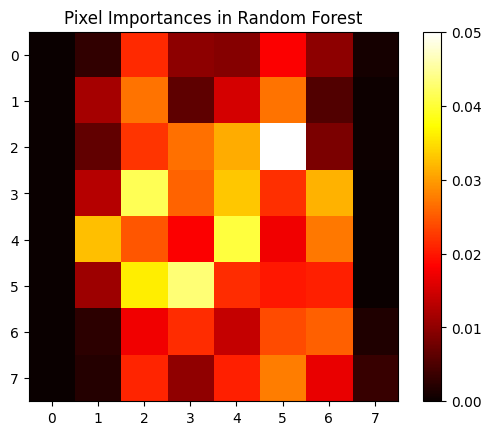

In [23]:
#practice problem
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Load data
digits = load_digits()

#inishlizing the model
rf = RandomForestClassifier()

#givig parameters for tuning the model
param_grid  = {
    'max_depth': [30,60,90],#value = 3   # the deepth of the trees i have put the deept a lill high cozz this data set is big
    'min_samples_split': [2,3],#value = 2  # the minimum spilt of the data
    'n_estimators': [200,300], #value = 2  # number of trees i again put this a lill to high for more acc data 20-50 will be good good
    'max_features': ['sqrt', 'log2'] #value = 2 # skiped 'auto'
}
   # 3 * 2 * 2 * 2 =24 models cv=5 => 24*5 =120fits

#tuning the model by gridsearch

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1) #giving parameters
grid_search.fit(digits.data, digits.target)#tuning

# Get feature importance
importances = grid_search.best_estimator_.feature_importances_

# Reshape into 8x8 grid (because digits images are 8x8)
importances_img = importances.reshape(8, 8)

# Plot feature importance
plt.imshow(importances_img, cmap="hot", interpolation="nearest")
plt.colorbar()
plt.title("Pixel Importances in Random Forest")
plt.show()

In [27]:
grid_search.best_score_

np.float64(0.9438177034973693)

In [28]:
import numpy as np

# Get feature importances
importances = grid_search.best_estimator_.feature_importances_

# Sort indices in descending order of importance
indices = np.argsort(importances)[::-1]

# Print top 10
print("Top 10 most important pixels:")
for i in range(10):
    print(f"Pixel {indices[i]} - Importance: {importances[indices[i]]:.4f}")


Top 10 most important pixels:
Pixel 21 - Importance: 0.0501
Pixel 43 - Importance: 0.0431
Pixel 26 - Importance: 0.0415
Pixel 36 - Importance: 0.0404
Pixel 42 - Importance: 0.0361
Pixel 28 - Importance: 0.0332
Pixel 33 - Importance: 0.0325
Pixel 30 - Importance: 0.0317
Pixel 20 - Importance: 0.0312
Pixel 61 - Importance: 0.0277


In [29]:
# Pick top 44 important features
top_n = 44
selected_indices = indices[:top_n]

# Reduce dataset to only those pixels
X_reduced = digits.data[:, selected_indices]

# Retrain model on reduced dataset
grid_search_reduced = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_reduced.fit(X_reduced, digits.target)

print("Reduced model best score:", grid_search_reduced.best_score_)


Reduced model best score: 0.9449195295574124
